# Single Neuron Model

This notebook implements the single neuron model, which encompasses the perceptron, linear regression, and logistic regression models.

These three models all have the same underlying algorithm, but different cost and activation functions. I will define a class for the single neuron model, and show how it can be used to implement the perceptron, linear regression, and logistic regression models I have fitted in their respective notebooks.

---

First, load the relevant libraries needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Import functions from scikit-learn to help with training/testing endeavors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## The Data

The model will be trained using the [Hawks](https://r-data.pmagunia.com/dataset/r-dataset-package-stat2data-hawks) dataset. This dataset contains observations for three species of hawks, and attributes such as age, sex, wing length, body weight, tail length, etc. 

The code block below reads the dataset into a pandas DataFrame object, subsets the DataFrame to the relevant variables, and drops any rows where there are missing values for these relevant variables.

In [2]:
# Read in the data and subset it to the relevant columns/observations
hawks = pd.read_csv("../../Data/hawks.csv")
hawks = hawks[["Species", "Wing", "Tail", "Weight", "Culmen", "Hallux"]].dropna(axis=0)
hawks

,Species,Wing,Tail,Weight,Culmen,Hallux
0,RT,385.0,219,920.0,25.7,30.1
2,RT,381.0,235,990.0,26.7,31.3
3,CH,265.0,220,470.0,18.7,23.5
4,SS,205.0,157,170.0,12.5,14.3
5,RT,412.0,230,1090.0,28.5,32.2
...,...,...,...,...,...,...
903,RT,380.0,224,1525.0,26.0,27.6
904,SS,190.0,150,175.0,12.7,15.4
905,RT,360.0,211,790.0,21.9,27.6
906,RT,369.0,207,860.0,25.2,28.0


## Implementing the algorithm: a custom class

The class below contains methods that are useful to implementing the single neuron from scratch.

For details about the algorithm, check out the `README.md` in this directory.

In [3]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    weights_: numpy.ndarray
        The weights and bias of the single neuron, the last entry being the bias.

    train_errors_: list
        A list containing error computed after each iteration of stochastic gradient descent.

    activation_function: function
        The activation function applied to the preactivation linear combination.
    
    cost_function: function
        The cost function used to measure model performance.
 
    equation_: a string that formats the weight of the model into a linear regression equation

    """

    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function
        self.equation = ""

    def train(self, X, y, alpha = 0.005, epochs = 50):
        """
        Train a single neuron model by iterating through the stochastic gradient descent 
        algorithm. This occurs for a total of "epochs" number of times with learning rate "alpha".

        Parameters
        ----------
        X: matrix of feature values
        y: array of observed values
        alpha (float): learning rate
        epochs (int): number of iterations to train the model for

        Returns: None
        """
        n_obs, n_features = X.shape
        self.train_errors_ = []

        # Initialize coefficients/weights and intercept/bias from a uniform distribution
        self.weights_ = np.random.rand(1 + n_features)

        # Implement stochastic gradient descent  
        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.weights_[:-1] -= alpha * error * xi
                self.weights_[-1] -= alpha * error
                errors += self.cost_function(self.predict(xi), target)
            self.train_errors_.append(errors / n_obs)
        
        # Format a nice equation to print using the model weights
        self.set_equation()
    
    def set_equation(self):
        """
        Using the model weights, format a nice equation to print
        """
        eqn = f"y' = {self.weights_[-1]:.3f}"
        for i in range(0, len(self.weights_)-1):
            term = self.weights_[i]
            if (np.sign(term) < 0):
                eqn += f" - {abs(term):.3f}x_{i+1}"
            else:
                eqn += f" + {term:.3f}x_{i+1}"
        self.equation_ = eqn

    def predict(self, X):
        """
        Make a y_hat prediction on each feature vector using the weights and bias,
        the feature vectors in X, and the activation_function.
        """ 
        preactivation = np.dot(X, self.weights_[:-1]) + self.weights_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        """
        Plot the loss/error for each iteration of stochastic gradient descent.
        """
        plt.figure(figsize = (7, 5))
        plt.plot(range(1, len(self.train_errors_) + 1), self.train_errors_)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title("Cost Calculated After Each Iteration During Training")

    def plot_decision_boundary(self, X, y, x_title = "x", y_title = "y"):
        """
        Plot the decision boundary for the trained single neuron model 
        (for classification tasks)
        """
        plt.figure(figsize = (7, 5))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(x_title, fontsize = 15)
        plt.ylabel(y_title, fontsize = 15)

## 1. The Perceptron

First, I will use the `SingleNeuron` class to implement the perceptron. Specifically, I will be implementing a binary classifier that determines if a hawk is red-tailed or not given their tail and wing length, as demonstrated in my [perceptron notebook](https://github.com/kary5678/INDE-577/blob/main/supervised-learning/perceptron/perceptron.ipynb).

In the aforementioned notebook, I found that this set of predictors produced the better classifier out of the perceptron models I fitted. Therefore, I will just fit this one perceptron model, and confirm that its performance is the same or very similar to what I implemented previously.

In [4]:
# Set up predictors matrix (X) and response vector (y)
X = hawks[["Wing", "Tail"]].to_numpy()
# Convert each entry of y with RT (red-tailed) to -1 and otherwise 1
hawks["Species_binary"] = [1 if x == "RT" else -1 for x in hawks.Species]
y = hawks["Species_binary"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [5]:
# Define the sign activation function and mean squared error cost function for the perceptron
def sign_activation(z):
    return np.sign(z)

def mean_squared_error(y_hat, y):
    return .5 * (y_hat - y)**2

In [6]:
# Train a perceptron using the same parameters as in the perceptron notebook
per_model = SingleNeuron(sign_activation, mean_squared_error)
per_model.train(X_train, y_train, alpha = 0.5, epochs = 10_000)
per_model.weights_

array([   900.27836826,   -958.53989003, -66280.49928288])

In [7]:
per_model.equation_ # format the weights into a nice equation

"y' = -66280.499 + 900.278x_1 - 958.540x_2"

### Performance/error analysis of perceptron model

Now, I will examine the performance of the model, in terms of training error and testing error. Firstly, I look at the error plot from training the perceptron model. This plot looks the same as what I obtained in my perceptron notebook.

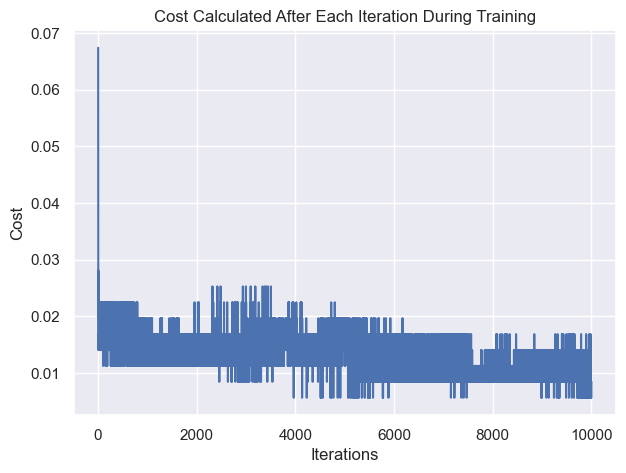

In [8]:
per_model.plot_cost_function()
plt.show()

I obtain similar training/testing accuracy (98% and 99% respectively) too.

In [9]:
# Obtain predictions for training set and find the error of the model
y_train_pred = per_model.predict(X_train)
print("Training accuracy:", sum(y_train == y_train_pred) / len(y_train))

Training accuracy: 0.9817415730337079


In [10]:
# Obtain predictions for testing set and find the test accuracy
y_test_pred = per_model.predict(X_test)
print("Testing accuracy:", sum(y_test == y_test_pred) / len(y_test))

Testing accuracy: 0.9888268156424581


To show model performance, I output the classification report for the test data. The perceptron model has high accuracy, precision, and recall overall.

In [11]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       1.00      0.97      0.99        73
           1       0.98      1.00      0.99       106

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



Since we have a classification problem, it would be good to visualize predictive performance using a confusion matrix.

In [12]:
def plot_RT_confusion_matrix(y_actual, y_pred):
    """
    Plots the confusion matrix given the actual and predicted values
    to easily view accurate classifications and type I/II errors
    """  
    # want to invert the order of the classes in outputted matrix (have 1 on top row/left column)        
    classes = np.unique(y_actual)[::-1] 
    # Obtain confusion matrix
    cf_matrix = confusion_matrix(y_actual, y_pred, labels = classes)

    # View the confusion matrix using the seaborn package
    plt.figure(figsize = (6, 4))
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Hawk Species Classification Confusion Matrix\n', fontsize = 14)
    ax.set_xlabel('\nPredicted Values', fontsize = 12)
    ax.set_ylabel('Actual Values ', fontsize = 12)
    ax.xaxis.set_ticklabels(["RT", "Not RT"])
    ax.yaxis.set_ticklabels(["RT", "Not RT"])

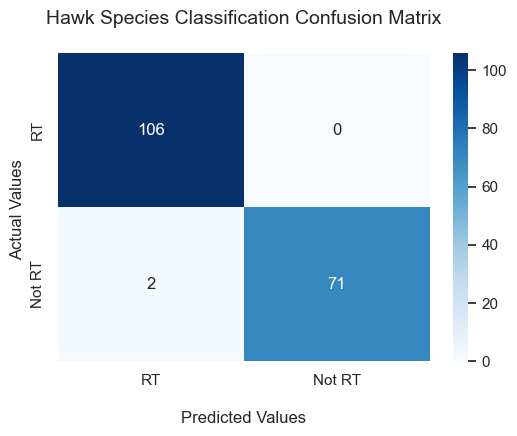

In [13]:
plot_RT_confusion_matrix(y_test, y_test_pred)
plt.show()

There are only 2 misclassifications for the perceptron model. These two observations are not red-tailed hawks, but the perceptron classifies them as red-tailed. In general, as we can see from the decision regions plot below, the perceptron does a good job finding the appropriate decision boundary for the hawk data.

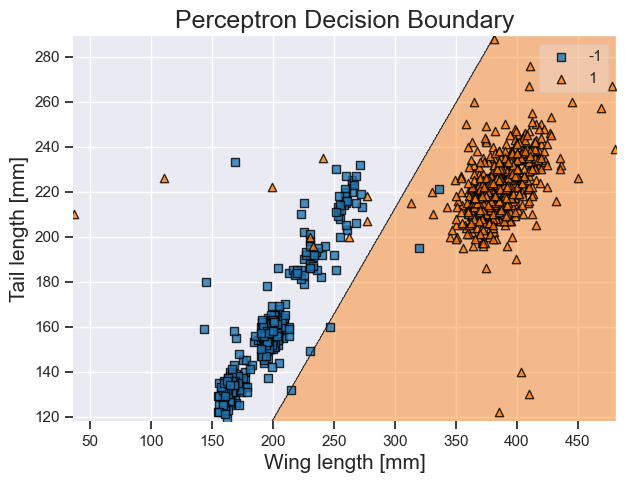

In [14]:
per_model.plot_decision_boundary(X, y, x_title = "Wing length [mm]", y_title = "Tail length [mm]")
plt.title("Perceptron Decision Boundary", fontsize = 18)
plt.show()

## 2. Logistic Regression

Next, I will use the `SingleNeuron` class to implement the logistic regression. Just like I did for the perceptron, I will be implementing a binary classifier that determines if a hawk is red-tailed or not given their tail and wing length, as demonstrated in my [logistic regression notebook](https://github.com/kary5678/INDE-577/blob/main/supervised-learning/logistic_regression/logistic_regression.ipynb).

In the aforementioned notebook, I found that this set of predictors produced the better classifier out of the logistion regression models I fitted. Therefore, I will just fit this one logistic regression model, and confirm that its performance is the same or very similar to what I implemented previously.

In [15]:
# Using same predictors matrix (X) as in model 1

# Convert each entry of y with RT (red-tailed) to 1 and otherwise 0
hawks["Species_binary2"] = [1 if x == "RT" else 0 for x in hawks.Species]
y2 = hawks["Species_binary2"].to_numpy()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.20, random_state=1)

In [16]:
# Define the sigmoid activation function and cross entropy cost function used for logistic regression
def sigmoid_activation(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

In [17]:
# Train the logistic regression model
log_model = SingleNeuron(sigmoid_activation, cross_entropy_loss)
log_model.train(X_train2, y_train2, alpha = 0.0001, epochs = 5000)

/var/folders/vw/11tt08k53x3ftj1j70zwt66c0000gn/T/ipykernel_5323/65740744.py:6: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
/var/folders/vw/11tt08k53x3ftj1j70zwt66c0000gn/T/ipykernel_5323/65740744.py:6: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


The "RuntimeWarning: divide by zero encountered in log" error is possible due to a predicted probability being very close to 0 or 1, which causes the logarithm to approach NaN (not a number). The "RuntimeWarning: invalid value encountered in multiply" error occurs for the same reason.

To prevent these errors, I could standardize or normalize the features to a more appropriate range. This doesn't always solve the issue, however. Interpretation wise, it could also change the importance of certain features, which in turn affects the predicted probability.

In [18]:
print(log_model.weights_)

[ 0.09039764 -0.11716431 -3.32105327]


In [19]:
print(log_model.equation_) # format the weights into a nice equation

y' = -3.321 + 0.090x_1 - 0.117x_2


### Performance/error analysis of logistic regression model

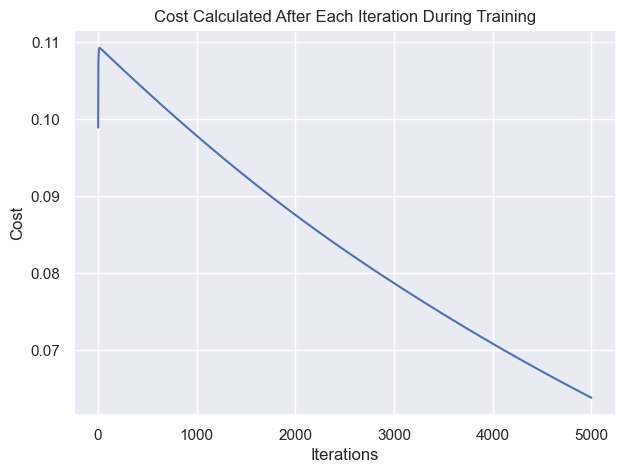

In [20]:
log_model.plot_cost_function()
plt.show()

The error plot from fitting the logistic regression model under the single neuron class looks similar to what I obtained in my logistic regression notebook.

In [21]:
# Obtain predictions for training set and find the error of the model
y_train_pred2 = np.rint(log_model.predict(X_train2))
print("Training accuracy:", sum(y_train2 == y_train_pred2) / len(y_train2))

Training accuracy: 0.9747191011235955


In [22]:
# Obtain predictions for testing set and find the test accuracy
y_test_pred2 = np.rint(log_model.predict(X_test2))
print("Testing accuracy:", sum(y_test2 == y_test_pred2) / len(y_test2))

Testing accuracy: 0.9888268156424581


Training and testing accuracy were 98% and 99% respectively in my logistic regression notebook, and that is essentially what I obtain here as well.

In [23]:
print(classification_report(y_test2, y_test_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.98      1.00      0.99       106

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



The high accuracy, precision, and recall exist here too, as expected since I fit a logistic regression model with the same training data and parameters.

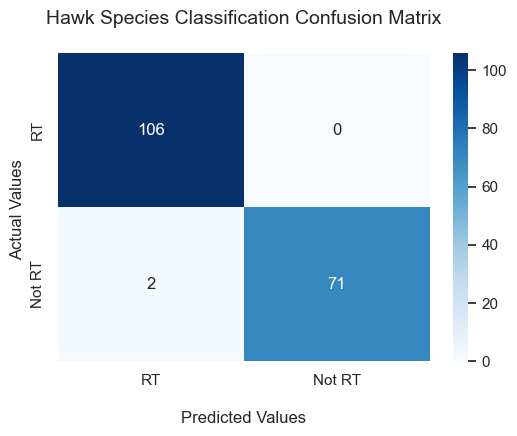

In [24]:
plot_RT_confusion_matrix(y_test2, y_test_pred2)
plt.show()

I get a similar confusion matrix to the one I obtained from fitting the perceptron above, and it is also similar to what I obtain from my logistic regression notebook.

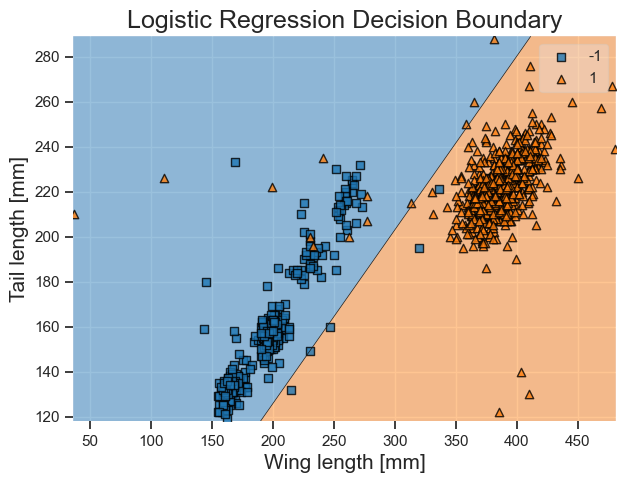

In [25]:
log_model.plot_decision_boundary(X, y, x_title = "Wing length [mm]", y_title = "Tail length [mm]")
plt.title("Logistic Regression Decision Boundary", fontsize = 18)
plt.show()

The decision regions plot looks appropriate and similar too!

## 3. Linear Regression

Now I will switch gears from classification tasks to a regression task. In my [linear regression notebook](https://github.com/kary5678/INDE-577/blob/main/supervised-learning/linear_regression/linear_regression.ipynb), I modeled the linear relationship between wing length and the weight of a hawk. I will replicate that linear model here to show that linear regression is encompassed by the single neuron.

In [26]:
# Set up predictors matrix (X) and response vector (y)
X3 = hawks[["Wing"]].to_numpy()
y3 = hawks["Weight"].to_numpy()

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=1)

In [27]:
def linear_regression_activation(z):
    return z

# No need to define a new cost function, as linear regression uses mean squared error too

In [28]:
# Fit the linear regression model
lin_model = SingleNeuron(linear_regression_activation, mean_squared_error)
lin_model.train(X_train3, y_train3, alpha = 0.00001, epochs = 5000)
print(lin_model.weights_) # prints the model parameters

[   4.31766317 -633.32494679]


In [29]:
print(lin_model.equation_) # display the equation for the linear line

y' = -633.325 + 4.318x_1


### Performance/error analysis of linear regression model

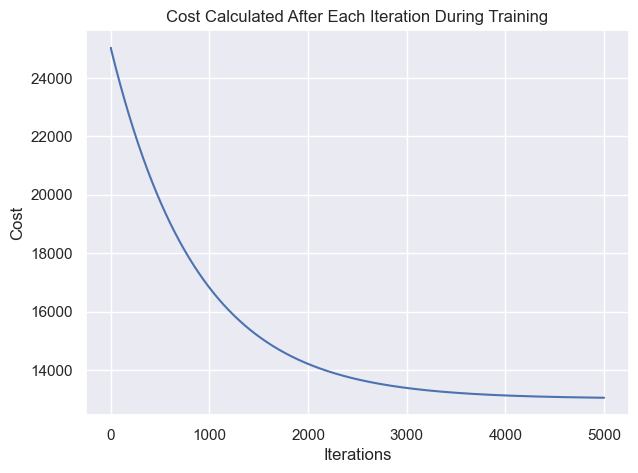

In [30]:
lin_model.plot_cost_function()
plt.show()

The error plot from fitting the linear regression model under the single neuron class looks similar to what I obtained in my linear regression notebook.

I get similar mean squared errors as well, so I know that this model performs the same as the one I had already implemented.

In [31]:
# Obtain predictions for training set and find the error of the model
y_train_pred3 = lin_model.predict(X_train3)
sum(mean_squared_error(y_train_pred3, y_train3) / len(y_train3) * 2)

31353.761285829456

In [32]:
# Obtain predictions for testing set and find the error of the model
y_test_pred3 = lin_model.predict(X_test3)
sum(mean_squared_error(y_test_pred3, y_test3) / len(y_test3) * 2)

20250.031718645885

I can confirm the performance of this linear regression model by looking at a plot of the linear fit with respect to the data.

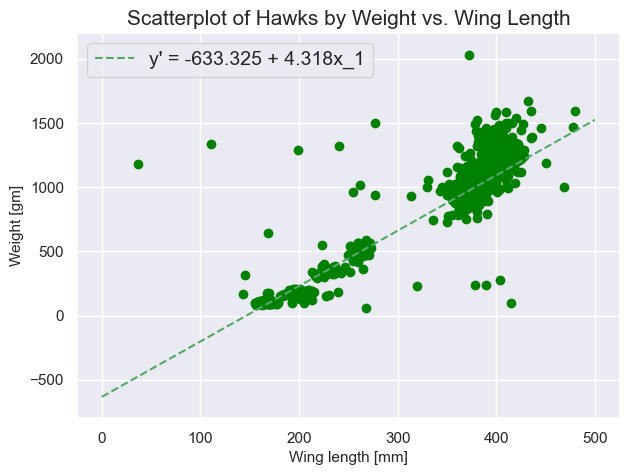

In [33]:
# Obtain the linear regression line
line_x = np.linspace(0, 500, 100)
line_y = lin_model.weights_[1] + lin_model.weights_[0]*line_x

plt.figure(figsize = (7, 5))
plt.title("Scatterplot of Hawks by Weight vs. Wing Length", fontsize = 15)
plt.ylim((-800, 2200))
plt.scatter(X3, y3, color = "green")
plt.xlabel("Wing length [mm]", fontsize = 11)
plt.ylabel("Weight [gm]", fontsize = 11)
plt.plot(line_x, line_y, '--g', label = lin_model.equation_)
plt.legend(fontsize = 14, loc = "upper left")
plt.show()

The data follows the regression line closely for the data! Furthermore, the slope and intercept are basically what I obtained in my linear regression notebook.

Of course, it would be a good practice to examine other performance metrics such as the coefficient of determination, but I already did and more that in my linear regression notebook, so I will not replicate the work here.

## Closing Remarks

Through the use of a single class and different activation/cost functions, I was able to fit a perceptron, logistic regression, and linear regression as a single neuron, netting the same fits and performance as I previously obtained. 

The modular programming is beneficial because it simplifies things greatly - rather than writing an individual class for each of the 3 algorithms as I did in their respective notebooks, I could just create subclasses of the single neuron to implement the perceptron, logistic regression, and linear regression. It is a lot easier to work with, and also easier to maintain/debug!